<a href="https://colab.research.google.com/github/elmedianikhadija/PFE-WITH-SIR/blob/main/pfe_MOROCCO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importer les librairies

In [2]:
import sys
!{sys.executable} -m pip install --user --quiet pandas>=1.0.3 matplotlib scipy numpy

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import pandas as pd

#importer la base de donnée



Les données sont chargées directement depuis [GitHub Repo][CountryData]. Comme le référentiel est régulièrement mis à jour avec de nouvelles données réelles, nous pouvons obtenir des estimations actualisées chaque fois que nous exécutons le code. 


In [11]:
infected_dataset_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
recovered_dataset_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
deaths_dataset_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
countries_dataset_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv"

In [ ]:
infected_dataset = pd.read_csv(infected_dataset_url)
infected_dataset.head()

In [13]:
infected_dataset.to_csv("infectedDATA.csv", index=False)

In [ ]:
infected_original = pd.read_csv("/content/infectedDATA.csv") 

infected_original.head()

In [ ]:
recovered_dataset = pd.read_csv(recovered_dataset_url)
recovered_dataset.head()

In [17]:
recovered_dataset.to_csv("recoveredDATA.csv", index=False)

In [ ]:
recovered_original = pd.read_csv("/content/recoveredDATA.csv") 

recovered_original.head()

In [ ]:
deaths_dataset = pd.read_csv(deaths_dataset_url)
deaths_dataset.head()

In [20]:
deaths_dataset.to_csv("deathsDATA.csv", index=False)

In [ ]:
deaths_original = pd.read_csv("/content/deathsDATA.csv") 

deaths_original.head()

In [22]:
countries_dataset = pd.read_csv(countries_dataset_url)
deaths_dataset.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/3/22,5/4/22,5/5/22,5/6/22,5/7/22,5/8/22,5/9/22,5/10/22,5/11/22,5/12/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7683,7683,7684,7684,7684,7684,7685,7685,7686,7686
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3496,3496,3496,3496,3496,3497,3497,3497,3497,3497
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6875,6875,6875,6875,6875,6875,6875,6875,6875,6875
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,153,153,153,153,153,153,153,153,153,153
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1900,1900,1900,1900,1900,1900,1900,1900,1900,1900


In [23]:
countries_dataset.to_csv("countriesDATA.csv", index=False)

In [24]:
countries = pd.read_csv("/content/countriesDATA.csv") 

countries.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
0,4,AF,AFG,4.0,NaN,NaN,NaN,Afghanistan,33.93911,67.709953,Afghanistan,38928341.0
1,8,AL,ALB,8.0,NaN,NaN,NaN,Albania,41.15330,20.168300,Albania,2877800.0
2,10,AQ,ATA,10.0,NaN,NaN,NaN,Antarctica,-71.94990,23.347000,Antarctica,NaN
3,12,DZ,DZA,12.0,NaN,NaN,NaN,Algeria,28.03390,1.659600,Algeria,43851043.0
4,20,AD,AND,20.0,NaN,NaN,NaN,Andorra,42.50630,1.521800,Andorra,77265.0


Les données sur les cas infectés/récupérés se trouvent dans trois tableaux séparés, et nous avons également besoin des informations sur la population du pays, qui se trouvent dans un tableau séparé. Comme certains pays sont subdivisés en territoires (par exemple, les États-Unis - par État/ville), nous additionnons également ces territoires (en utilisant la somme) pour obtenir les chiffres globaux du pays :


In [25]:
population = countries[countries['Province_State'].isnull()][['Country_Region','Population']].rename(columns={'Country_Region' : 'Country/Region'}).set_index('Country/Region')
population.head()

,Population
Country/Region,
Afghanistan,38928341.0
Albania,2877800.0
Antarctica,NaN
Algeria,43851043.0
Andorra,77265.0


In [26]:
infected = infected_original.groupby('Country/Region').sum().reset_index().set_index('Country/Region').join(population,on='Country/Region')
infected.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/4/22,5/5/22,5/6/22,5/7/22,5/8/22,5/9/22,5/10/22,5/11/22,5/12/22,Population
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,...,178901,178905,178919,178922,178981,179010,179017,179131,179169,38928341.0
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,...,275211,275266,275310,275341,275366,275372,275416,275440,275485,2877800.0
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,...,265782,265786,265791,265794,265798,265800,265804,265806,265808,43851043.0
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,...,41717,41717,41717,41717,41717,41717,41717,41717,42156,77265.0
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,...,99287,99287,99287,99287,99287,99287,99287,99287,99287,32866268.0


In [27]:
deaths = deaths_original.groupby('Country/Region').sum().reset_index().set_index('Country/Region').join(population,on='Country/Region')
deaths.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/4/22,5/5/22,5/6/22,5/7/22,5/8/22,5/9/22,5/10/22,5/11/22,5/12/22,Population
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,...,7683,7684,7684,7684,7684,7685,7685,7686,7686,38928341.0
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,...,3496,3496,3496,3496,3497,3497,3497,3497,3497,2877800.0
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,...,6875,6875,6875,6875,6875,6875,6875,6875,6875,43851043.0
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,...,153,153,153,153,153,153,153,153,153,77265.0
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,...,1900,1900,1900,1900,1900,1900,1900,1900,1900,32866268.0


In [28]:
recovered = recovered_original.groupby('Country/Region').sum().reset_index().set_index('Country/Region').join(population,on='Country/Region')
recovered.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/4/22,5/5/22,5/6/22,5/7/22,5/8/22,5/9/22,5/10/22,5/11/22,5/12/22,Population
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,38928341.0
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2877800.0
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,43851043.0
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,77265.0
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,32866268.0


#Calcul des paramètres à l'aide du modèle SIR

Tout d'abord, nous définissons la fonction pour résoudre le modèle SIR avec des valeurs de départ et des paramètres donnés.

In [30]:
# Les équations différentielles du modèle SIR.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Calculer le modèle SIR à partir d'un nombre donné de personnes infectées/enlevées.
def sir_model(infected,removed,N,beta,gamma,ndays):
    t = np.linspace(0,ndays,ndays)
    y0 = N-infected-removed,infected,removed
    ret = odeint(deriv, y0, t, args=(N, beta, gamma))
    return ret.T # S,I,R

La fonction model calcule le modèle en fonction des valeurs réelles des personnes nouvellement infectées dans V et des cas retirés dans R. Elle calcule le modèle SIR pour le nombre de jours donné, puis calcule et renvoie la fonction de perte entre les données réelles et calculées.

fit utilise ensuite l'optimisation SciKit Learn pour trouver le meilleur paramètre 𝛽 , étant donné la valeur fixe 𝛾= the_gamma



Pour trouver des paramètres, nous devons optimiser la fonction par rapport aux paramètres β et γ. Dans notre expérience, nous avons constaté que 7 points de données bruyants ne nous permettent pas d’optimiser efficacement deux paramètres, nous fixons donc γ paramètre selon des études médicales (voir ce rapport de l’OMS), qui indiquent un temps de récupération moyen de 30 jours. Nous utilisons ensuite la méthode de SciKit Learn pour trouver et renvoyer la valeur optimale de β:modelminimize

La façon dont nous calculons l’erreur est la suivante. Parce que le nombre le plus précis que nous avons est le nombre total de personnes infectées à une date donnée (sans tenir compte des personnes supprimées), le moyen le plus simple serait de calculer le nombre de nouveaux cas chaque jour, dV. Dans le modèle SIR, le nombre qui correspond au nombre total de personnes infectées sera représenté par I+R, c’est-à-dire que nous ajoutons le nombre de personnes actuellement infectées (I), et qui ont déjà subi la maladie (R). Le nombre de nouveaux cas quotidiens dans le modèle SIR sera donc donné par différence journalière de I+R, notée par dI. La valeur d’erreur renvoyée sera la norme du vecteur.dV-dI

Pour trouver des paramètres, nous devons optimiser la fonction par rapport aux paramètres β et γ. Dans notre expérience, nous avons constaté que 7 points de données bruyants ne nous permettent pas d’optimiser efficacement deux paramètres, nous fixons donc γ paramètre selon des études médicales (voir ce rapport de l’OMS), qui indiquent un temps de récupération moyen de 30 jours. Nous utilisons ensuite la méthode de SciKit Learn pour trouver et renvoyer la valeur optimale de β:model minimize

In [31]:
# Modèle sur un vecteur donné de malades V et de distants R
def model(V,R,N,beta,gamma):
    S,I,R = sir_model(V[0],R[0],N,beta,gamma,len(V))
    dV = np.diff(V)
    dI = np.diff(I+R)
    return np.linalg.norm(dV-dI)

# Fixer le paramètre gamma
the_gamma = 1/30

# Faire correspondre les paramètres du modèle aux vecteurs V et R
def fit(V,R,N):
    # res = minimize(lambda x:model(V,R,N,x[0],x[1]),x0=[0.5,1/20],method='powell')
    # return res.x[0],res.x[1]
    res = minimize(lambda x:model(V,R,N,x,the_gamma),x0=0.5,method='powell')
    return res.x,the_gamma

#Réalisation de l'analyse d'un pays

Ici, nous chargeons les données du pays spécifié dans un cadre de données séparé (appelé cadre de données du pays). make_frame reformate les données du pays original dans le cadre de données et effectue une moyenne de fenêtre courante pour lisser les courbes.

Nous calculons  la colonne qui contient le nombre de personnes retirées de la population sensible. Removed

Nous appellerons la table résultante country dataframe, et notre code contient la fonction , qui récupère cette trame de données et la population pour un pays donné son nom.make_frame

la fonction get_start_index:
pour estimer R0, nous devons partir d’un point commun pour tous les pays, disons, à partir d’un jour où le nombre de personnes infectées a dépassé 1000. Nous nous concentrerons ensuite sur une période de plusieurs jours, désignée par . Prendre une semaine en considération semble être une bonne idée.ndays

In [32]:
def make_frame(country_name,smooth_window=3):
    f = pd.DataFrame([infected.loc[country_name],recovered.loc[country_name],deaths.loc[country_name]]).T
    population = f.iloc[-1,0]
    f = f.iloc[2:-1].reset_index()
    f.columns = ['Date','Infected','Recovered','Deaths']
    f['Removed'] = f['Recovered']+f['Deaths']
    f["Date"] = pd.to_datetime(f["Date"],format="%m/%d/%y")
    for x in ['Infected','Recovered','Deaths','Removed']:
        f[x+"_Av"] = f[x].rolling(window=smooth_window).mean()
    return population, f

def get_start_index(df):
    return df[df['Infected_Av']>1000].index[0]

compute_params est la méthode principale d'implémentation de l'algorithme Sliding SIR : elle parcourt tous les jours à partir de la date de départ et effectue l'ajustement sur 7 jours du modèle SIR en utilisant la fonction fit ci-dessus.

En pratique, il est intéressant de voir comment les paramètres du modèle évoluent au fil du temps, en réaction aux mesures de protection mises en œuvre par différents pays. Semblable au nombre reproducteur de base R0 qui est une caractéristique d’une maladie, nous pouvons considérer le nombre reproducteur effectif Rt, qui a la même signification – nombre de personnes qu’une seule personne infectée infecte davantage – mais pendant la pandémie, en tenant compte des mesures d’isolement et de la proportion de population non sensible.

#Nous pouvons suivre la même approche pour estimer Rt:

Commencez à partir du point où il y a 1000 personnes infectées (start_index)

Déplacez une fenêtre coulissante d’une largeur de 7 jours (notée par paramètre) sur toute la période jusqu’à aujourd’hui.ndays

À chaque point, utilisez 7 jours consécutifs pour estimer β (et, par conséquent, Rt) en utilisant la fonction ci-dessus, en minimisant la différence carrée entre le nombre réel et prévu de nouvelles personnes infectées.fit

Pour calculer Rt, nous trouvons le paramètre optimal β pour chaque jour, en organisant une fenêtre coulissante sur notre dataframe pays :

In [33]:
def compute_params(df,population, start_index, ndays=8):
    for i in range(start_index,len(df)-ndays):
        V = df['Infected_Av'][i:i+ndays].to_numpy()
        R = df['Removed_Av'][i:i+ndays].to_numpy()
        beta,gamma = fit(V,R,population)
        df.loc[i,'Beta'] = beta
        df.loc[i,'Gamma'] = gamma

La méthode ci-dessous met tout en place, elle prend le nom du pays, charge les données, et effectue l'ajustement du SIR glissant et les calculs de Rt. Elle renvoie le cadre et la population du pays enrichi.

Une fois que nous avons la valeur de , nous pouvons calculer Rt pour chaque jour dans le cadre de données du pays:beta

In [34]:
def analyze(country_name,truncate_frame=True):
    population, df = make_frame(country_name)
    n = get_start_index(df)
    compute_params(df,population,n)
    df['Rt'] = df['Beta'] / df['Gamma']
    return population, df.iloc[n:] if truncate_frame else df

pop, df = analyze('Morocco')

In [35]:
df.head()

,Date,Infected,Recovered,Deaths,Removed,Infected_Av,Recovered_Av,Deaths_Av,Removed_Av,Beta,Gamma,Rt
75,2020-04-06,1120.0,81.0,80.0,161.0,1020.000000,74.333333,69.666667,144.000000,0.067586,0.033333,2.027575
76,2020-04-07,1184.0,93.0,90.0,183.0,1108.333333,83.333333,80.000000,163.333333,0.065807,0.033333,1.974205
77,2020-04-08,1275.0,97.0,93.0,190.0,1193.000000,90.333333,87.666667,178.000000,0.064992,0.033333,1.949753
78,2020-04-09,1374.0,109.0,97.0,206.0,1277.666667,99.666667,93.333333,193.000000,0.068530,0.033333,2.055908
79,2020-04-10,1448.0,122.0,107.0,229.0,1365.666667,109.333333,99.000000,208.333333,0.074891,0.033333,2.246722


In [47]:
df.to_csv("parametre.csv", index=False)

Ci-dessous, nous affichons les données pour la Russie. Quelques dates spécifiques sont également mises en évidence.

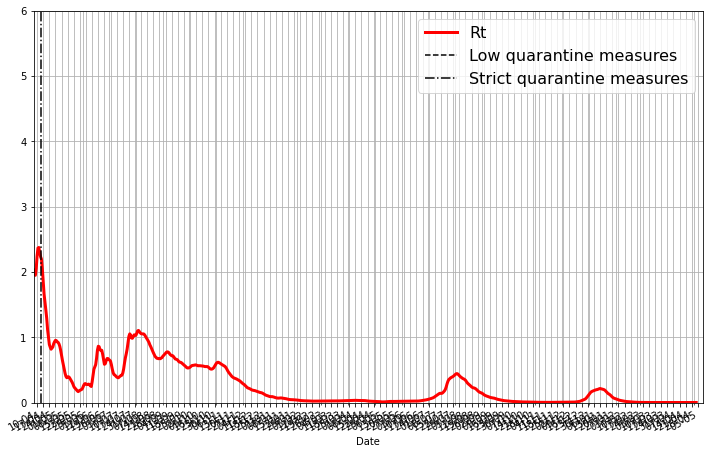

In [36]:
import matplotlib.dates as mdates
ax = df.plot('Date','Rt',linewidth=3,color='red',grid=True,ylim=(0,6),figsize=(12,8))
ax.axvline('2020-04-02', color='k', linestyle='--',label='Low quarantine measures')
ax.axvline('2020-04-15', color='k', linestyle='-.',label='Strict quarantine measures')
ax.xaxis.grid(True, which='minor')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
plt.gcf().autofmt_xdate()
plt.legend(fontsize=16)

Population = 36910558.0, Infection start date (>100) = 2020-04-06


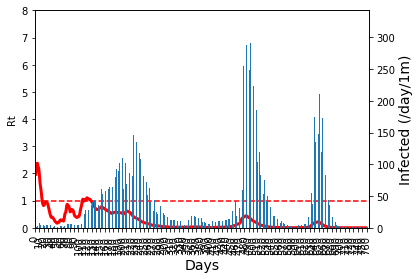

In [37]:
def plot(population,df,ax=None):
    n = 0 # get_start_index(df)
    start_date = df.iloc[n,0]
    if ax is None:
        print("Population = {}, Infection start date (>100) = {}".format(population,start_date.date()))
    df['Days'] = df['Date'].apply(lambda x : (x-start_date).days)
    df['PI'] = df['Infected'] / population * 100
    df['Delta_Infected_Gr'] = (df['Infected'].diff()).clip(lower=0) / population * 1000000
    ax = ax or plt.gca()
    ax = df.plot('Days','Rt',ax=ax,legend=False,linewidth=3,color='red')
    ax.axhline(y = 1,linestyle='--', color='red')
    ax.set_ylim(0,8)
    ax.set_ylabel('Rt')
    df.plot(x='Days',y='Delta_Infected_Gr',secondary_y=True,kind='bar',ax=ax,legend=False)#,xticks=df['Days'][::10])
    ax.set_xlabel('Days',fontsize=14)
    ax.set_xticks(df['Days'][::10])
    ax.set_xticklabels(df['Days'][::10])
    ax.right_ax.set_ylabel('Infected (/day/1m)',fontsize=14)

plot(pop,df)

#Comparaison de plusieurs pays
Nous définissons plusieurs pays sous forme de grille, car il est plus facile de les étudier groupe par groupe. Cette grille est également utilisée pour le traçage.

Nous effectuons des calculs pour chaque pays, et stockons sa grille dans un dictionnaire.

In [39]:
countries = [
    ['France', 'Germany'],
    ['Morocco', 'Russia']]

# Calculer tous les pays
country_data = {}
for x in sum(countries,[]):
    print("Données de calcul pour {}".format(x))
    country_data[x] = analyze(x)

Données de calcul pour France
Données de calcul pour Germany
Données de calcul pour Morocco
Données de calcul pour Russia


Produire un tableau des valeurs de 𝑅0 pour les pays. Il suffit de prendre la valeur de 𝑅𝑡 à l'indice 0

In [40]:
r0s = pd.DataFrame([ (c,k[1].iloc[0]['Rt']) for c,k in country_data.items() ],columns=['Country','R0'])
r0s

,Country,R0
0,France,6.173621
1,Germany,6.864733
2,Morocco,2.027575
3,Russia,5.612825


Produisons maintenant un graphique multi-pays.

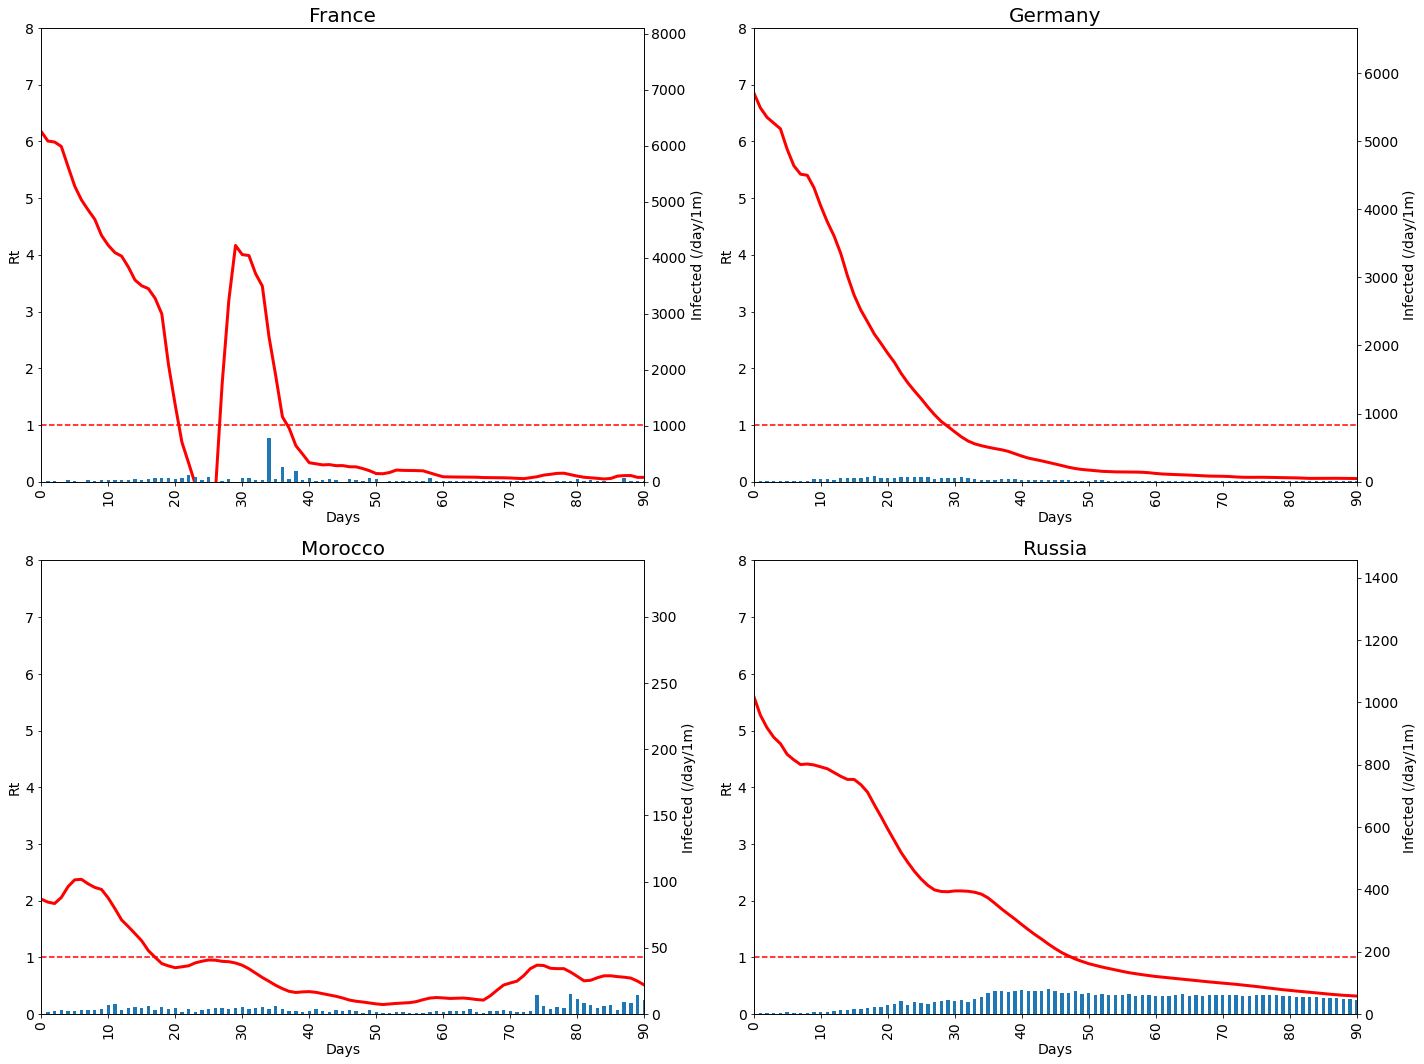

In [41]:
mx = max([len(x) for x in countries])
my = len(countries)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
plt.rc('font',size=14)
fig,ax = plt.subplots(my,mx,figsize=(20,15),sharex=False)
for i in range(my):
    for j in range(mx):
        c = countries[i][j]
        pop,df = country_data[c]
        plot(pop,df,ax=ax[i,j])
        ax[i,j].set_xlim(0,90)
        ax[i,j].set_title(c,fontsize=20)
        ax[i,j].axes.xaxis.set_visible(True)
fig.tight_layout()
plt.show()

#Comparaison des graphiques de 𝑅𝑡

Nous voulons maintenant tracer les graphiques 𝑅𝑡 sur un seul graphique. Pour ce faire, nous convertissons le dictionnaire en un cadre de données, avec les jours en lignes et les noms de pays en colonnes :

In [42]:
rtdf = [
    cd[1][['Days','Rt']].set_index('Days').rename(columns={'Rt':c }) for c,cd in country_data.items()]

In [43]:
from functools import reduce
rtdf = reduce(lambda df,f : df.join(f), rtdf)

In [44]:
rtdf

,France,Germany,Morocco,Russia
Days,,,,
0,6.173621,6.864733,2.027575,5.612825
1,6.007047,6.594144,1.974205,5.272391
2,5.989156,6.424906,1.949753,5.049302
3,5.912089,6.324705,2.055908,4.881660
4,5.558392,6.222227,2.246722,4.768512
...,...,...,...,...
790,NaN,NaN,NaN,NaN
791,NaN,NaN,NaN,NaN
792,NaN,NaN,NaN,NaN


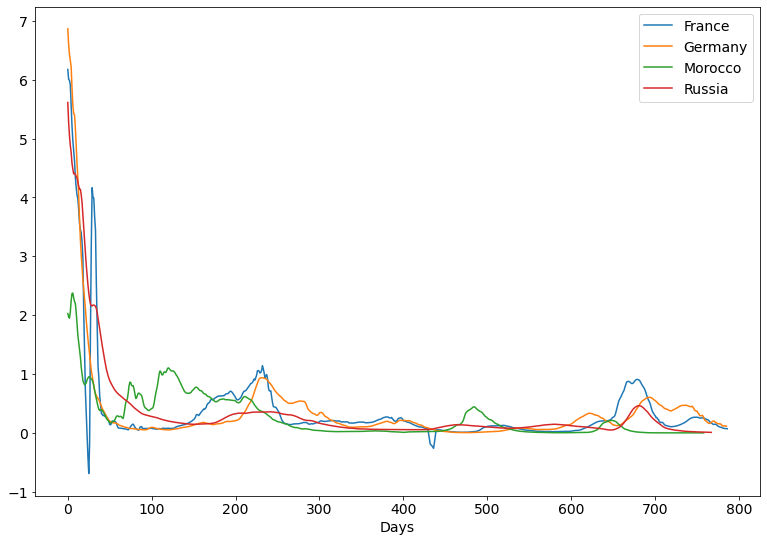

In [45]:
rtdf.plot(figsize=(13,9))

Il n'est pas pratique de voir tous les graphiques sur un seul tracé, c'est pourquoi nous ne traçons que quelques pays d'intérêt.

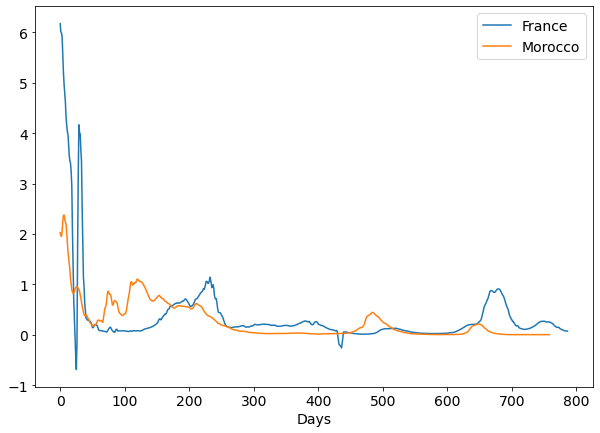

In [46]:
def plot_countries(l):
    rtdf = [cd[1][['Days','Rt']].set_index('Days').rename(columns={'Rt':c }) for c,cd in country_data.items() if c in l]
    rtdf = reduce(lambda df,f : df.join(f), rtdf)
    rtdf.plot(figsize=(10,7))

plot_countries(['France','Morocco'])

#Modélisation de l'épidémie 

Tout d'abord, nous définissons les paramètres d'une ville :

#Morocco


In [65]:
# Population, N.
N = 36910558
# Nombre initial d'infectés et de guéris, I0 et R0.
I0, R0 = 100, 0
# Les autres (S0) sont potentiellement sensibles
S0 = N - I0 - R0

# Coefficient de transmission bêta et temps moyen inverse de récupération gamma (en 1/jour).
beta, gamma = 0.067586, 1./30

# Nombre de jours à calculer :
days = 400

In [66]:
t = np.linspace(0, days, days)

Tout d'abord, définissons le membre de droite des équations différentielles. Nous supposons que le vecteur y contient trois valeurs (S, I et R) :

In [67]:
# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

Nous définissons le vecteur initial (conditions limites) et résolvons l'équation en utilisant odeint :

In [68]:
# Initial Vector
y0 = S0, I0, R0
# Solve SIR equations on time grid t
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

Maintenant, nous allons tracer le graphique :

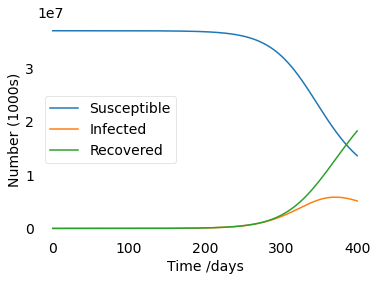

In [69]:
fig = plt.figure()
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(S,label='Susceptible')
ax.plot(I,label='Infected')
ax.plot(R,label='Recovered')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [54]:
print("R0={}".format(beta/gamma))

R0=2.02758
